In [1]:
# import important packages

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# importing warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('data.xlsx')

df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
df.shape

(233154, 41)

<h1> Preliminary Data Inspection 

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [6]:
df.UniqueID.is_unique

True

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [9]:
df['Employment.Type'].fillna('Unemployed',inplace=True)

<AxesSubplot:>

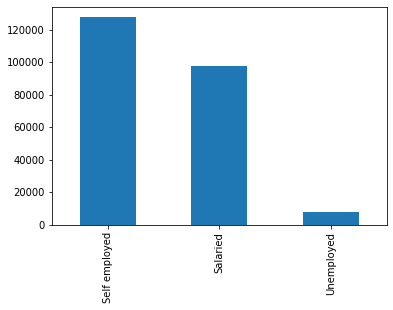

In [10]:
df['Employment.Type'].value_counts().plot(kind='bar')

In [11]:
df = df.drop("UniqueID", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   disbursed_amount                     233154 non-null  int64         
 1   asset_cost                           233154 non-null  int64         
 2   ltv                                  233154 non-null  float64       
 3   branch_id                            233154 non-null  int64         
 4   supplier_id                          233154 non-null  int64         
 5   manufacturer_id                      233154 non-null  int64         
 6   Current_pincode_ID                   233154 non-null  int64         
 7   Date.of.Birth                        233154 non-null  datetime64[ns]
 8   Employment.Type                      233154 non-null  object        
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

<h4>Statistical description of the quantitative data variables

In [12]:
df.describe()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


<h4>How is the target variable distributed overall?

<h5> changing account age and credit history lengths to integers in months

In [13]:
def change_age_to_months(age):
    yrs = int(age.split()[0].replace('yrs',''))
    mon =  int(age.split()[1].replace('mon',''))
    return 12*yrs+mon

df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(change_age_to_months)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(change_age_to_months)



In [14]:
df[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'] ]

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
233149,28,28
233150,17,17
233151,9,46
233152,14,38


<h5> changing date type columns to integers in years

In [15]:
df[['Date.of.Birth','DisbursalDate'] ].head()

,Date.of.Birth,DisbursalDate
0,1984-01-01,2018-08-03
1,1985-08-24,2018-08-01
2,1977-12-09,2018-09-26
3,1988-06-01,2018-09-23
4,1994-07-14,2018-10-08


In [16]:
from datetime import date
def change_age_to_yrs(dte):
    today = date.today()
    age = int(today.year - dte.year - ((today.month, today.day) < (dte.month, dte.day)))
  
    return age
    
    

In [17]:
df['Date.of.Birth' ] = df['Date.of.Birth'].apply(change_age_to_yrs)
df['DisbursalDate' ] = df['DisbursalDate'].apply(change_age_to_yrs)

In [18]:
df[['Date.of.Birth','DisbursalDate'] ].head()

,Date.of.Birth,DisbursalDate
0,37,3
1,36,3
2,43,2
3,33,2
4,27,2


In [19]:
df[['Date.of.Birth','DisbursalDate'] ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Date.of.Birth  233154 non-null  int64
 1   DisbursalDate  233154 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB


In [20]:
pd.set_option("display.max_columns", None)
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,67,22807,45,1441,37,Salaried,3,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53278,61360,89.63,67,22807,45,1497,36,Self employed,3,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,52378,60300,88.39,67,22807,45,1495,43,Self employed,2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,46349,61500,76.42,67,22807,45,1502,33,Salaried,2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,43594,78256,57.50,67,22744,86,1499,27,Self employed,2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
numerical_data = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE' ,'PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','Date.of.Birth','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']

In [22]:
categorical_data = ['branch_id','State_ID','supplier_id','Employee_code_ID','manufacturer_id','Current_pincode_ID','Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

In [23]:
{column: len(df[column].unique()) for column in categorical_data}

{'branch_id': 82,
 'State_ID': 22,
 'supplier_id': 2953,
 'Employee_code_ID': 3270,
 'manufacturer_id': 11,
 'Current_pincode_ID': 6698,
 'Employment.Type': 3,
 'PERFORM_CNS.SCORE.DESCRIPTION': 20}

<h5>  Use pie charts to express how different types of employment defines defaulter and non-defaulters.

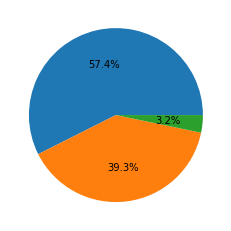

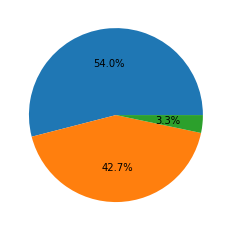

In [24]:
df_defaulters = df[df['loan_default'] ==1]
df_non_defaulters = df[df['loan_default'] ==0]
plt.pie(df_defaulters[('Employment.Type')].value_counts(), autopct = '%2.1f%%')
plt.show()
plt.pie(df_non_defaulters[('Employment.Type')].value_counts(), autopct = '%2.1f%%')
plt.show()

In [25]:
{column: len(df[column].unique()) for column in categorical_data}

{'branch_id': 82,
 'State_ID': 22,
 'supplier_id': 2953,
 'Employee_code_ID': 3270,
 'manufacturer_id': 11,
 'Current_pincode_ID': 6698,
 'Employment.Type': 3,
 'PERFORM_CNS.SCORE.DESCRIPTION': 20}

In [26]:
df_defaulters = df_defaulters.drop(['supplier_id', 'Current_pincode_ID', 'Employee_code_ID'], axis =1)


In [27]:
categorical_data = ['branch_id','State_ID','manufacturer_id','Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

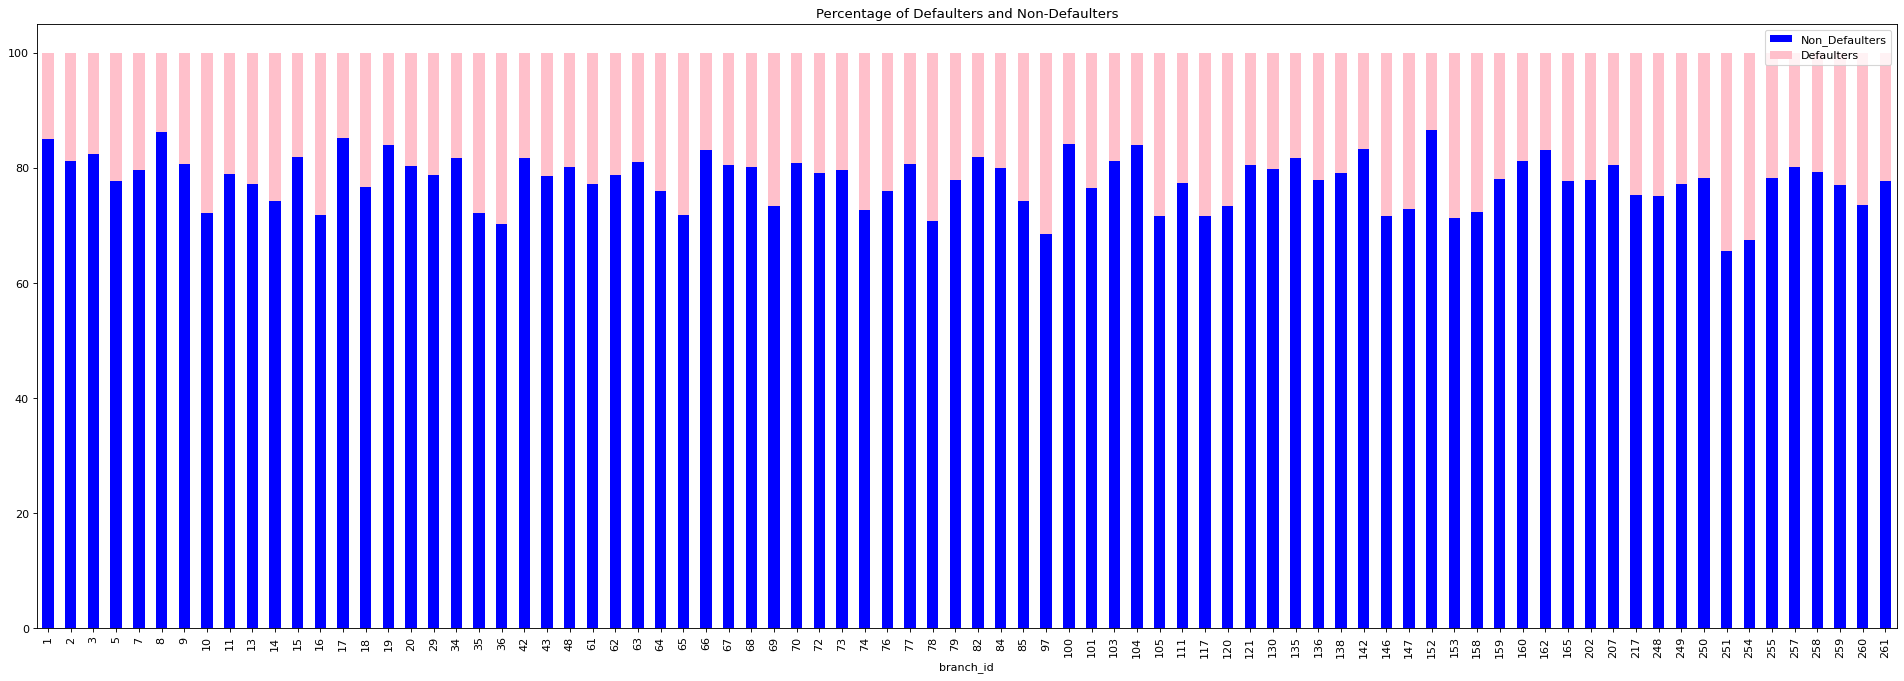

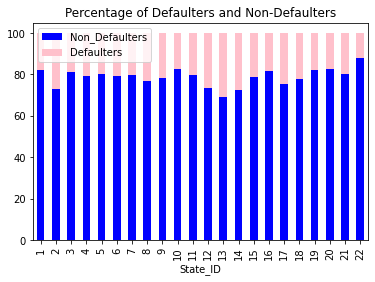

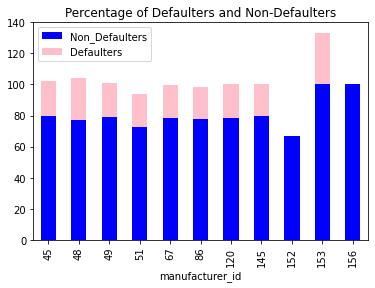

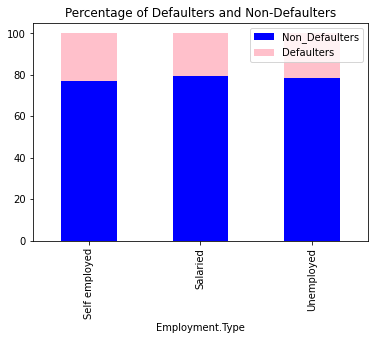

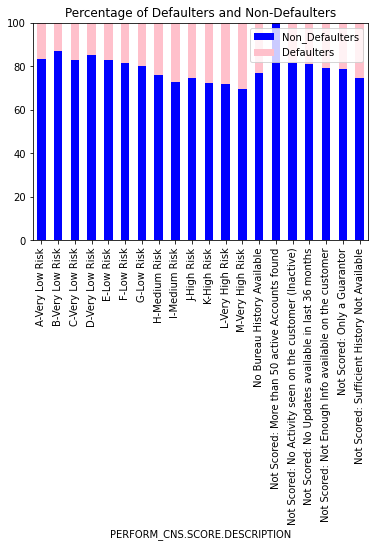

In [28]:
from matplotlib.pyplot import figure
figure(figsize = (30,10), dpi = 80)
for column in categorical_data:
    #x = 100 * (df_defaulters[column].value_counts())/(df[column].value_counts())
    y1 = 100 * (df_defaulters[column].value_counts())/(df[column].value_counts())
    y2 = 100 * (df_non_defaulters[column].value_counts())/(df[column].value_counts())
    y2.plot(kind = 'bar', color = 'blue')
    y1.plot(kind = 'bar', bottom =y2, color = 'pink')
    plt.xticks(rotation = 90)
    plt.xlabel(column)
    plt.title("Percentage of Defaulters and Non-Defaulters")
    plt.legend(['Non_Defaulters','Defaulters'])
    
    plt.show()

    



<h4>Has age got something to do with defaulting? What is the distribution of age w.r.t. to defaulters and non-defaulters?

In [29]:
df_defaulters['Date.of.Birth'].value_counts()

25    2509
26    2491
27    2395
29    2371
28    2325
31    2252
24    2221
30    2074
33    2045
32    1912
34    1889
35    1796
36    1727
37    1535
38    1465
41    1406
39    1396
40    1334
43    1210
45    1186
46    1099
44    1090
42    1089
48     942
49     827
47     822
50     804
51     800
52     628
53     611
23     597
54     498
56     484
55     439
22     412
57     308
58     302
59     258
61     236
60     235
21     231
62     131
63      98
64      74
65      37
66      15
67       3
20       2
Name: Date.of.Birth, dtype: int64

(array([ 3463., 12091., 10172.,  6523.,  6435.,  5139.,  3059.,  2340.,
         1162.,   227.]),
 array([20. , 24.7, 29.4, 34.1, 38.8, 43.5, 48.2, 52.9, 57.6, 62.3, 67. ]),
 <BarContainer object of 10 artists>)

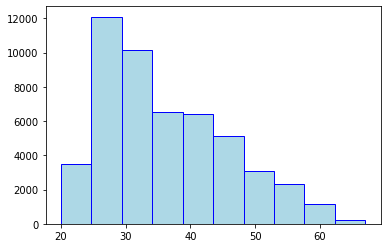

In [30]:
plt.hist(df_defaulters['Date.of.Birth'], facecolor = 'lightblue', edgecolor = 'blue', bins = 10)

<h6> It is clear that most defaulters are likely aged between 25 and 35

(array([1.8232e+04, 3.8895e+04, 3.5092e+04, 2.8047e+04, 2.2990e+04,
        2.1119e+04, 1.0568e+04, 5.7500e+03, 1.8410e+03, 9.0000e+00]),
 array([20. , 25.2, 30.4, 35.6, 40.8, 46. , 51.2, 56.4, 61.6, 66.8, 72. ]),
 <BarContainer object of 10 artists>)

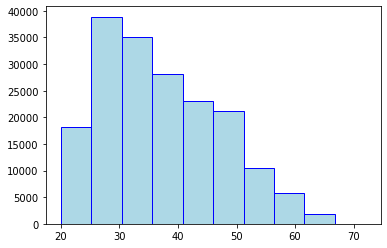

In [31]:
plt.hist(df_non_defaulters['Date.of.Birth'], facecolor = 'lightblue', edgecolor = 'blue', bins = 10)

<h5>What type of ID was presented by most of the customers as proof?

<h4>What type of ID was presented by most of the customers as proof

In [32]:
personal_IDs = ['Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag']

In [33]:
{column: len(df[(df[column]==1)]) for column in personal_IDs}

{'Aadhar_flag': 195924,
 'PAN_flag': 17621,
 'VoterID_flag': 33794,
 'Driving_flag': 5419,
 'Passport_flag': 496}

<h5> The most commonly used ID is the Aadhar card among customers

<h4>Study the credit bureau score distribution. How is the distribution for defaulters vs non-defaulters? Explore in detail.

In [34]:
print(df_defaulters['PERFORM_CNS.SCORE'].describe())
print("----------")
print(df_non_defaulters['PERFORM_CNS.SCORE'].describe())

count    50611.000000
mean       252.236372
std        318.826242
min          0.000000
25%          0.000000
50%          0.000000
75%        610.000000
max        879.000000
Name: PERFORM_CNS.SCORE, dtype: float64
----------
count    182543.000000
mean        299.784270
std         342.883794
min           0.000000
25%           0.000000
50%          15.000000
75%         690.000000
max         890.000000
Name: PERFORM_CNS.SCORE, dtype: float64


(array([29815.,  2996.,  2375.,  7339.,  8086.]),
 array([  0. , 175.8, 351.6, 527.4, 703.2, 879. ]),
 <BarContainer object of 5 artists>)

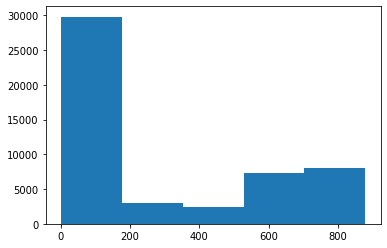

In [35]:
plt.hist(df_defaulters['PERFORM_CNS.SCORE'], bins = 5)

(array([99970.,  6996.,  6409., 31091., 38077.]),
 array([  0., 178., 356., 534., 712., 890.]),
 <BarContainer object of 5 artists>)

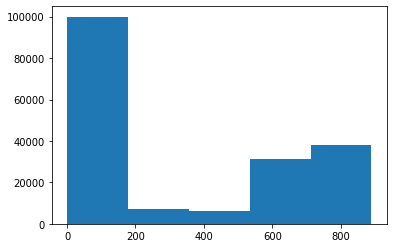

In [36]:
plt.hist(df_non_defaulters['PERFORM_CNS.SCORE'], bins = 5)

<h5> there doesnt seem to be much disparity in the CNS scoreright now in defaulting as majority of defaulters and non defaulters are both scored 0. For explorations sake, we will disregard the 0 scorers and only consider low and high scores.

In [37]:
df_scored = df[df['PERFORM_CNS.SCORE'] !=0]


In [38]:
df_scored['PERFORM_CNS.SCORE'].value_counts()

300    8776
738    8662
825    7393
15     3765
17     3672
       ... 
862       1
837       1
847       1
838       1
863       1
Name: PERFORM_CNS.SCORE, Length: 572, dtype: int64

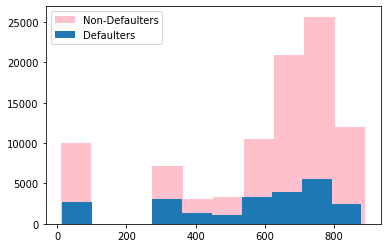

In [39]:
y2 = df_scored[df['loan_default'] ==0]
plt.hist(y2['PERFORM_CNS.SCORE'], bins = 10, stacked = True, color = "pink")
y1 = df_scored[df['loan_default'] ==1]
plt.hist(y1['PERFORM_CNS.SCORE'], bins = 10, stacked = True)
plt.legend(['Non-Defaulters', 'Defaulters'])
plt.show()

<h4>Explore the primary and secondary account details. Is the information in some way related to loan default probability ?

In [40]:
df.head()


,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,67,22807,45,1441,37,Salaried,3,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53278,61360,89.63,67,22807,45,1497,36,Self employed,3,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,52378,60300,88.39,67,22807,45,1495,43,Self employed,2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,46349,61500,76.42,67,22807,45,1502,33,Salaried,2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,43594,78256,57.50,67,22744,86,1499,27,Self employed,2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
primary_account_details = ['PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT']



In [42]:
{column: len(df[(df[column]!=0)]) for column in primary_account_details}

{'PRI.NO.OF.ACCTS': 116204,
 'PRI.ACTIVE.ACCTS': 96138,
 'PRI.OVERDUE.ACCTS': 26275,
 'PRI.CURRENT.BALANCE': 91458,
 'PRI.SANCTIONED.AMOUNT': 95058,
 'PRI.DISBURSED.AMOUNT': 94950}

In [43]:
def defaulters(dataframe, column):
    dataframe = dataframe[dataframe['loan_default']==1]
    return dataframe[column]
    

In [44]:
{column: len(df[(df[column]!=0) & (df['loan_default']==1)]) for column in primary_account_details}

{'PRI.NO.OF.ACCTS': 23559,
 'PRI.ACTIVE.ACCTS': 19560,
 'PRI.OVERDUE.ACCTS': 7203,
 'PRI.CURRENT.BALANCE': 18631,
 'PRI.SANCTIONED.AMOUNT': 19332,
 'PRI.DISBURSED.AMOUNT': 19330}

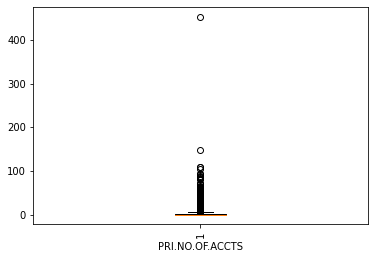

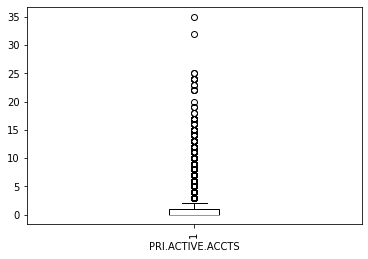

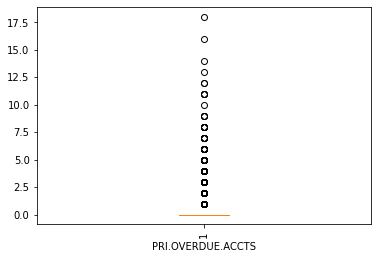

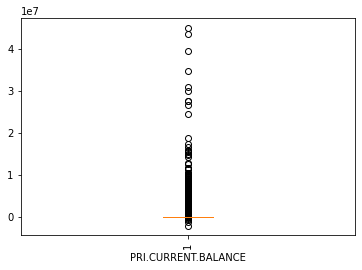

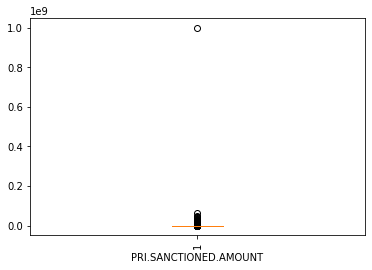

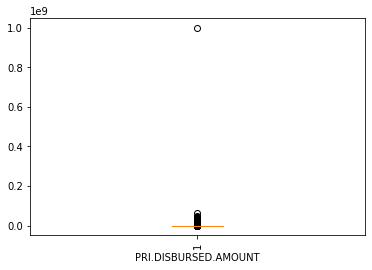

In [45]:
for column in primary_account_details:
    #y2 = df_scored[df['loan_default'] ==0]
    #plt.boxplot(y2[column])
    y1 = df[df['loan_default'] ==1]
    plt.boxplot(y1[column])
    
    plt.xticks(rotation = 90)
    plt.xlabel(column)
    plt.show()
    

In [46]:
df[df['PRI.NO.OF.ACCTS']>200]


,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
183232,49349,63540,78.69,160,24119,51,94,42,Self employed,2,16,1210,1,1,1,0,0,0,644,G-Low Risk,453,2,0,7590,7500,7500,0,0,0,0,0,0,3328,0,3,7,2,107,1,1
209069,65022,75889,89.60,249,23201,86,2213,49,Self employed,2,4,2126,1,1,0,0,0,0,391,K-High Risk,354,10,3,951966,1059500,1059500,0,0,0,0,0,0,5200,0,7,1,4,31,0,0
211079,56574,68895,85.00,19,15685,86,1873,36,Self employed,3,4,1055,1,1,0,0,0,0,323,L-Very High Risk,271,22,0,3296068,4469587,4469587,0,0,0,0,0,0,13836,0,28,0,3,50,0,0


In [47]:
df = df[df['PRI.NO.OF.ACCTS']<=200]

In [48]:
df.shape

(233151, 40)

In [49]:
df = df[(df['PRI.ACTIVE.ACCTS']<25)]

In [50]:
df['PRI.OVERDUE.ACCTS'].value_counts()

0     206868
1      19963
2       4297
3       1196
4        404
5        165
6         94
7         37
8         25
9         24
11        12
12         8
10         5
13         4
14         4
18         2
23         1
15         1
16         1
17         1
19         1
25         1
Name: PRI.OVERDUE.ACCTS, dtype: int64

In [51]:
df = df[(df['PRI.CURRENT.BALANCE']<20000000)]
df.shape

(233050, 40)

In [52]:
#&(df['loan_default']==1)

In [53]:
df = df[(df['PRI.SANCTIONED.AMOUNT']<20000000)]

In [54]:
df.shape

(233015, 40)

In [55]:
 df[(df['PRI.SANCTIONED.AMOUNT']>17000000)].shape

(22, 40)

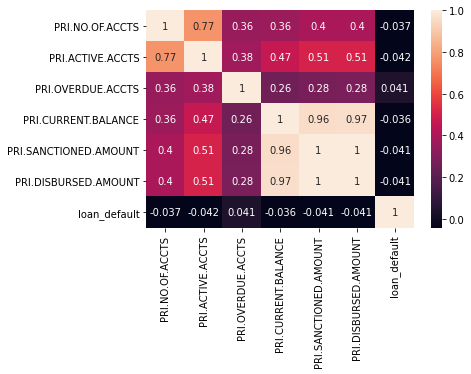

In [56]:
sns.heatmap(df[primary_account_details+ ['loan_default']].corr(),annot=True)
plt.show()

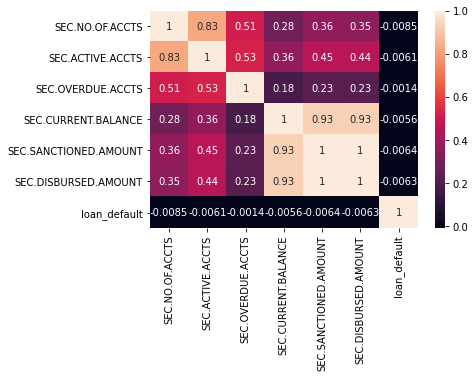

In [57]:
secondary_account_details = ['SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT']
sns.heatmap(df[secondary_account_details+ ['loan_default']].corr(),annot=True)
plt.show()

In [58]:
df_pri_only = df[df['PRI.NO.OF.ACCTS'] !=0]
df_sec_also = df[(df['PRI.NO.OF.ACCTS'] !=0) & (df['SEC.NO.OF.ACCTS'] !=0)]

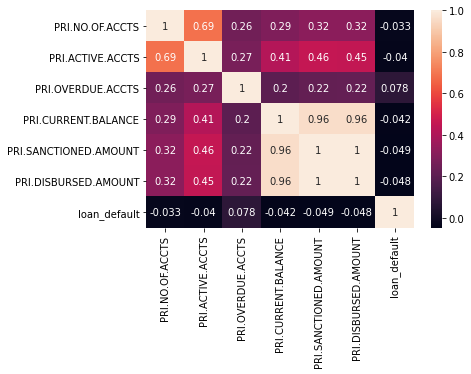

In [59]:
sns.heatmap(df_pri_only[primary_account_details+ ['loan_default']].corr(),annot=True)
plt.show()

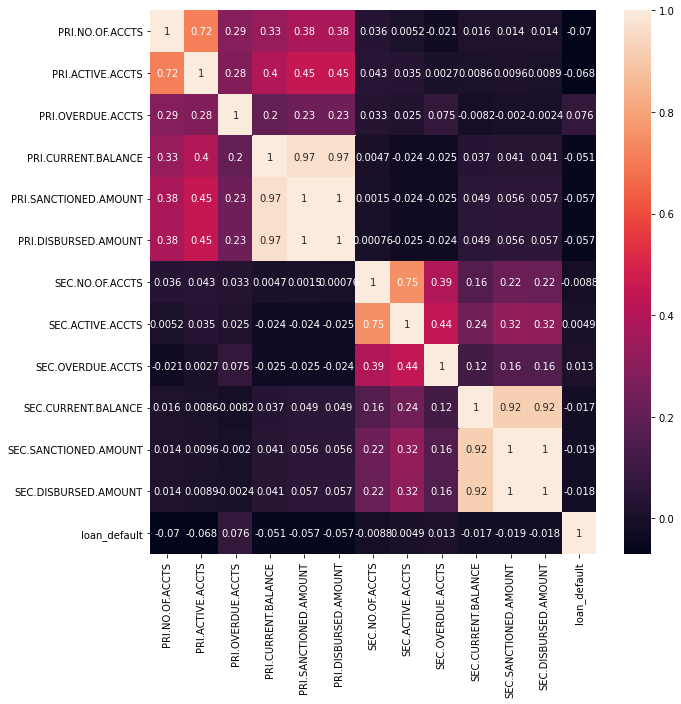

In [60]:
figure(figsize=(10,10))
sns.heatmap(df_sec_also[primary_account_details+ secondary_account_details + ['loan_default'] ].corr(),annot=True)
plt.show()

<h5> It can be concluded that there is not much correlation between loan defaults and their primary or secondary account details except that those with secondary accounts are less likely to be defaulters than those with only primary accounts

<h4> Is there a difference between the sanctioned and disbursed amount of primary & secondary loans. Study the difference by providing apt statistics and graphs.


In [61]:
df_amts = df[['PRI.DISBURSED.AMOUNT', 'PRI.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT', 'SEC.SANCTIONED.AMOUNT']]

In [62]:
pri_sanc_amt_counts = df['PRI.SANCTIONED.AMOUNT'].value_counts()
pri_sanc_amt_counts_percent = df['PRI.SANCTIONED.AMOUNT'].value_counts(normalize=True)*100
pri_disb_amt_counts = df['PRI.DISBURSED.AMOUNT'].value_counts()
pri_disb_amt_counts_percent = df['PRI.DISBURSED.AMOUNT'].value_counts(normalize=True)*100
sec_sanc_amt_counts = df['SEC.SANCTIONED.AMOUNT'].value_counts()
sec_sanc_amt_counts_percent = df['SEC.SANCTIONED.AMOUNT'].value_counts(normalize=True)*100
sec_disb_amt_counts = df['SEC.DISBURSED.AMOUNT'].value_counts()
sec_disb_amt_counts_percent = df['SEC.DISBURSED.AMOUNT'].value_counts(normalize=True)*100

pd.DataFrame({'pri_sanc_amt_counts':pri_sanc_amt_counts,'percent_of_data':pri_sanc_amt_counts_percent,'pri_disb_amt_counts':pri_disb_amt_counts,'percent_of_data_':pri_disb_amt_counts_percent,'sec_sanc_amt_counts':sec_sanc_amt_counts,'percent_of_data__':sec_sanc_amt_counts_percent,'sec_disb_amt_counts':sec_disb_amt_counts,'percent_of_data___':sec_disb_amt_counts_percent})

,pri_sanc_amt_counts,percent_of_data,pri_disb_amt_counts,percent_of_data_,sec_sanc_amt_counts,percent_of_data__,sec_disb_amt_counts,percent_of_data___
0,138094.0,59.263996,138203.0,59.310774,229285.0,98.399245,229317.0,98.412978
1,35.0,0.015020,44.0,0.018883,6.0,0.002575,5.0,0.002146
2,24.0,0.010300,25.0,0.010729,NaN,NaN,NaN,NaN
3,20.0,0.008583,20.0,0.008583,NaN,NaN,NaN,NaN
4,20.0,0.008583,19.0,0.008154,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19951166,NaN,NaN,1.0,0.000429,NaN,NaN,NaN,NaN
19969890,1.0,0.000429,NaN,NaN,NaN,NaN,NaN,NaN
25000000,NaN,NaN,NaN,NaN,1.0,0.000429,1.0,0.000429
26888200,NaN,NaN,NaN,NaN,1.0,0.000429,1.0,0.000429


<h5> trying to find a suitable hypothesis to test for difference between primary and secondary loan stats 

ha:-  u(sanctioned) - u(dispersed) == 0 no difference b/w disbursed and sanctioned 

h0: - u(sanctioned) - u(dispersed) < 0 difference b/w disbursed and sanctioned

In [63]:
import scipy.stats as stats
stats.ttest_ind(df['PRI.SANCTIONED.AMOUNT'], df['PRI.DISBURSED.AMOUNT'])

Ttest_indResult(statistic=0.3106406924277745, pvalue=0.7560739274023758)

In [64]:
stats.ttest_ind(df['SEC.SANCTIONED.AMOUNT'], df['SEC.DISBURSED.AMOUNT'])

Ttest_indResult(statistic=0.2181466083235246, pvalue=0.8273149790807601)

<h6> 0.75, 0.82> alpha - 0.05, therefore null hypothesis cannot be rejected

<h4>Do customer who make higher no. of enquiries end up being higher risk candidates? 

In [65]:
df_defaulters.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
2,52378,60300,88.39,67,45,43,Self employed,2,6,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7,53713,61780,89.83,67,45,53,Self employed,3,6,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,57713,68040,86.27,67,45,45,Self employed,2,6,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12,50578,58400,89.55,67,45,25,Salaried,3,6,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18,55513,67950,83.15,67,45,27,Salaried,2,6,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [66]:
df_defaulters['NO.OF_INQUIRIES'].value_counts()

0     42557
1      5441
2      1491
3       517
4       234
5       131
6        91
7        55
8        44
9        14
10       11
11        7
12        4
13        4
15        4
18        2
14        2
19        2
Name: NO.OF_INQUIRIES, dtype: int64

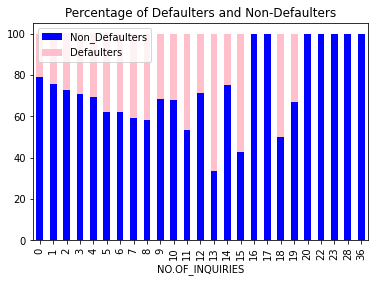

In [67]:
y1 = 100 * (df_defaulters['NO.OF_INQUIRIES'].value_counts())/(df['NO.OF_INQUIRIES'].value_counts())
y2 = 100 * (df_non_defaulters['NO.OF_INQUIRIES'].value_counts())/(df['NO.OF_INQUIRIES'].value_counts())
y2.plot(kind = 'bar', color = 'blue')
y1.plot(kind = 'bar', bottom =y2, color = 'pink')
plt.xticks(rotation = 90)
plt.xlabel('NO.OF_INQUIRIES')
plt.title("Percentage of Defaulters and Non-Defaulters")
plt.legend(['Non_Defaulters','Defaulters'])

plt.show()


<h6> from the above graph we can infer that as the number of enquiries increases, the likelyhood of defaulting also increases

<h4>Is credit history, i.e. new loans in last six months, loans defaulted in last six months, time since first loan, etc., a significant factor in estimating probability of loan defaulters?

In [68]:
credit_history = ['NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']

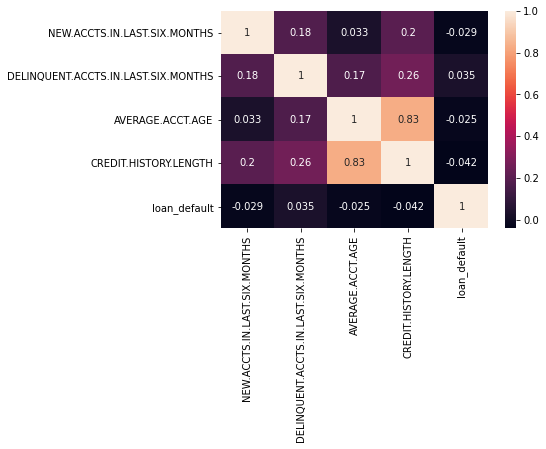

In [69]:
sns.heatmap(df[credit_history+ ['loan_default']].corr(),annot=True)
plt.show()

In [70]:
{column: len(df[(df[column]!=0) & (df['loan_default']==1)]) for column in credit_history}

{'NEW.ACCTS.IN.LAST.SIX.MONTHS': 9916,
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS': 4916,
 'AVERAGE.ACCT.AGE': 22933,
 'CREDIT.HISTORY.LENGTH': 23018}

In [71]:
{column: len(df[(df[column]!=0) ]) for column in credit_history}

{'NEW.ACCTS.IN.LAST.SIX.MONTHS': 51556,
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS': 18114,
 'AVERAGE.ACCT.AGE': 113642,
 'CREDIT.HISTORY.LENGTH': 113888}

In [72]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     181459
1      32073
2      10994
3       4437
4       1951
5        957
6        476
7        296
8        145
9         76
10        53
11        30
12        19
13        15
14        11
17         6
16         5
15         2
18         2
19         2
20         2
23         2
22         1
21         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

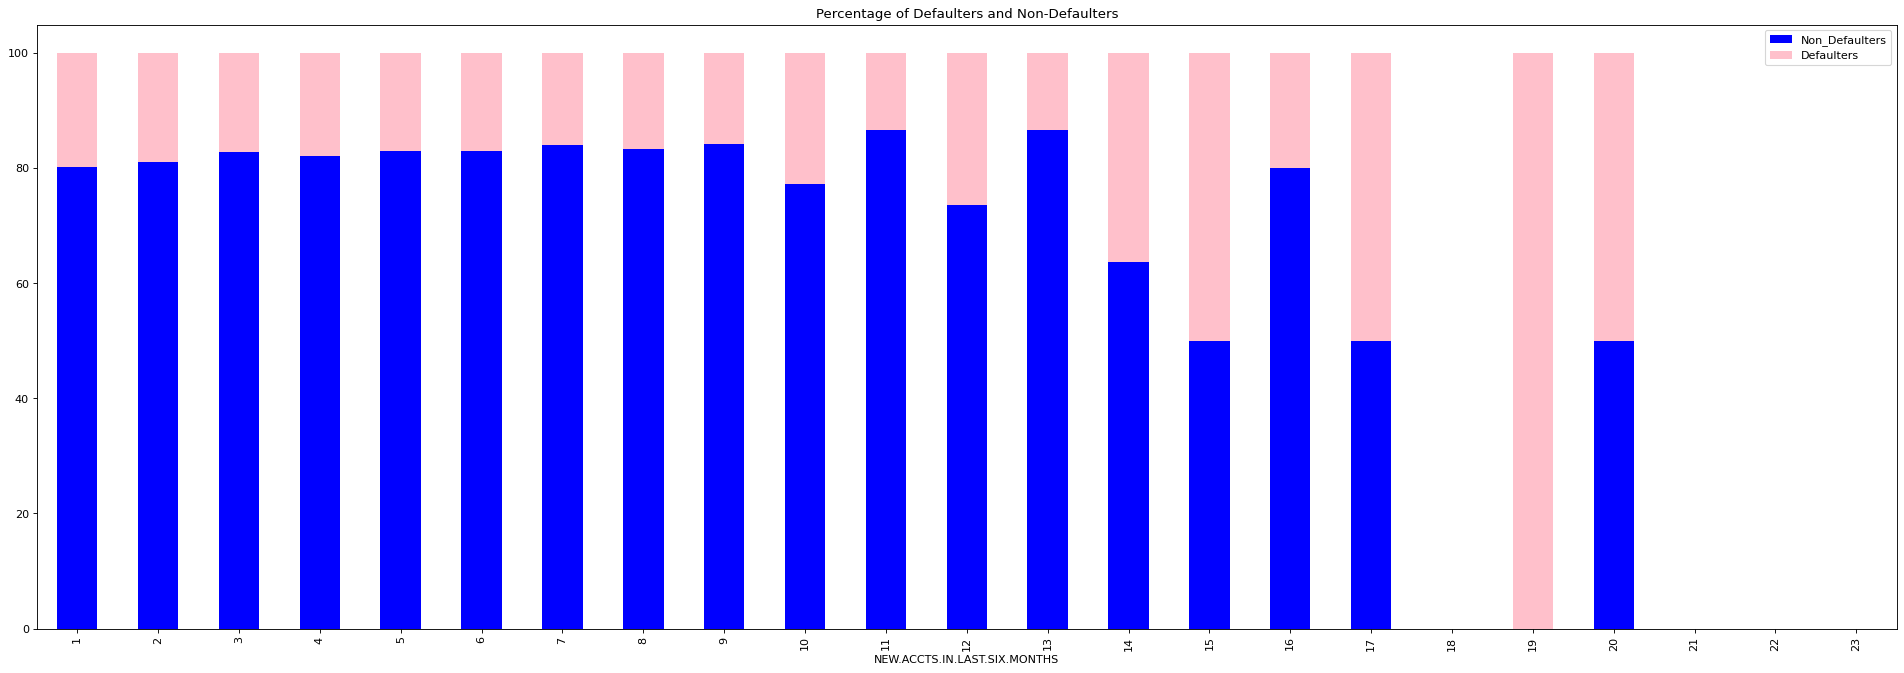

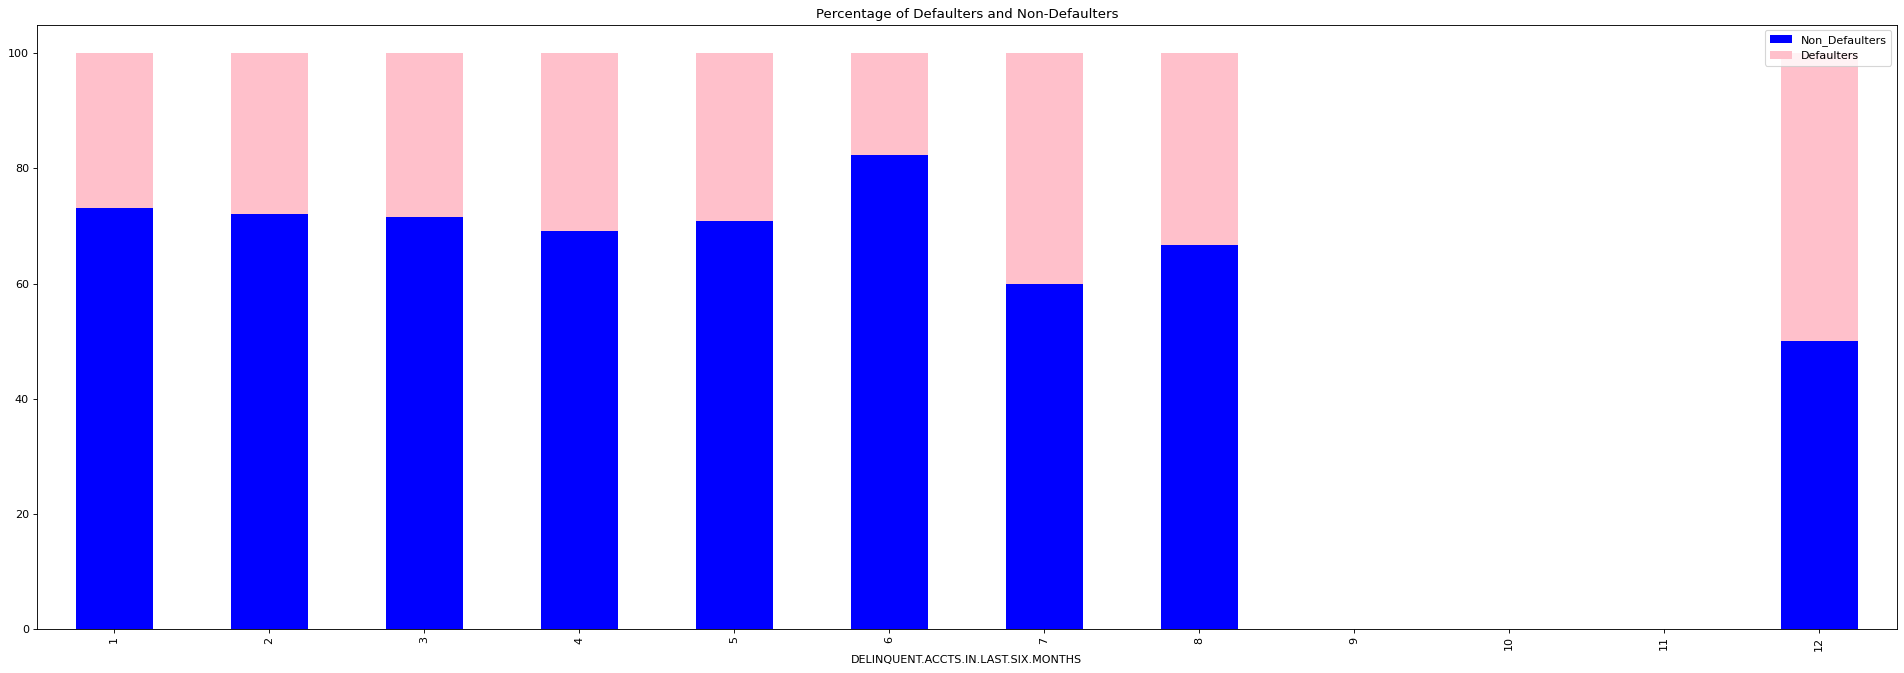

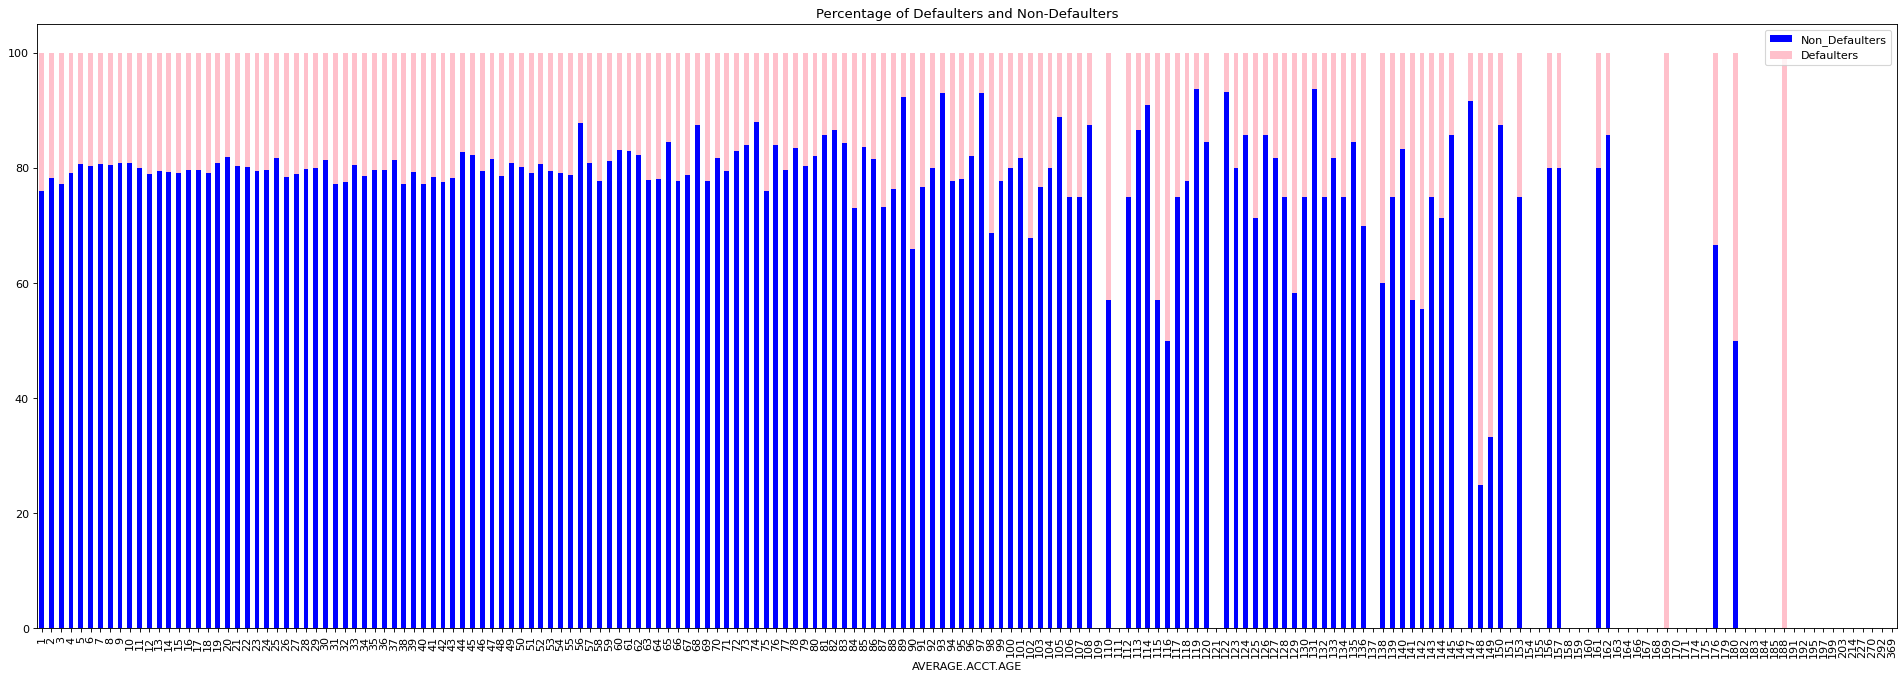

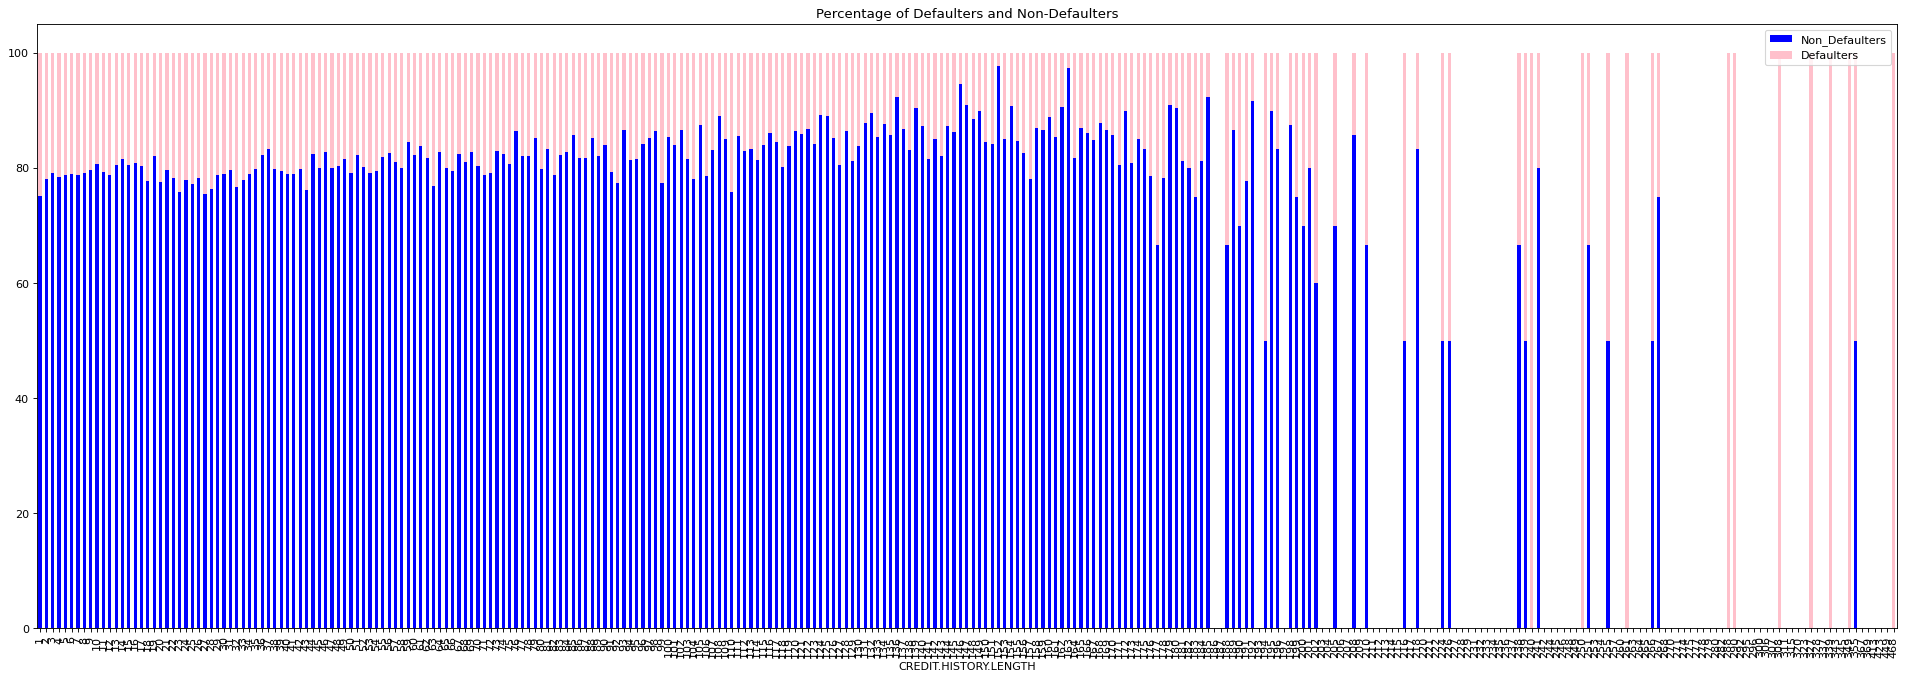

In [73]:

for column in credit_history:
    figure(figsize = (30,10), dpi = 80)
    y1 = 100 * df[(df[column]!=0) & (df['loan_default']==1)][column].value_counts() / df[df[column]!=0][column].value_counts()
    y2 = 100-y1
    y2.plot(kind = 'bar', color = 'blue')
    y1.plot(kind = 'bar', bottom =y2, color = 'pink')
    plt.xticks(rotation = 90)
    plt.xlabel(column)
    plt.title("Percentage of Defaulters and Non-Defaulters")
    plt.legend(['Non_Defaulters','Defaulters'])
    plt.show()

<h4>Perform logistic regression modelling, predict the outcome for the test data, and validate the results using the confusion matrix.

In [74]:
loan_data = df.drop(categorical_data, axis = 1)
loan_data.head()

,disbursed_amount,asset_cost,ltv,supplier_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,22807,1441,37,3,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53278,61360,89.63,22807,1497,36,3,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,52378,60300,88.39,22807,1495,43,2,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,46349,61500,76.42,22807,1502,33,2,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,43594,78256,57.50,22744,1499,27,2,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
loan_data.drop(['supplier_id', 'Current_pincode_ID', 'Employee_code_ID','MobileNo_Avl_Flag'], axis = 1)

,disbursed_amount,asset_cost,ltv,Date.of.Birth,DisbursalDate,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,37,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53278,61360,89.63,36,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,52378,60300,88.39,43,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,46349,61500,76.42,33,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,43594,78256,57.50,27,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233146,69659,85300,83.82,45,2,1,0,0,0,0,14,1,1,0,517479,607092,607092,0,0,0,0,0,0,0,0,0,0,10,10,0,0
233147,43272,59313,74.86,32,3,1,0,0,0,0,14,1,1,0,19686,50000,50000,0,0,0,0,0,0,1664,0,0,0,27,27,1,1
233148,47349,65502,74.81,51,3,1,0,0,0,0,14,1,1,0,552190,792000,792000,0,0,0,0,0,0,0,0,0,1,23,23,0,0
233149,57759,76350,77.28,39,2,1,0,0,0,0,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,28,0,0


In [76]:
loan_data = pd.get_dummies(loan_data,drop_first=True) 
print(loan_data.columns)

Index(['disbursed_amount', 'asset_cost', 'ltv', 'supplier_id',
       'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default'],
      dtype='object')


In [77]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn import metrics



In [78]:
y = loan_data['loan_default']
X_train, X_test, y_train, y_test = train_test_split(loan_data,  y, stratify=y, random_state=1)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(174761, 35)
(174761,)
(58254, 35)
(58254,)


In [79]:
(X_train.columns == X_test.columns).all()

True

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [81]:
lr = LogisticRegression()
fit=lr.fit(X_train, y_train)

In [82]:
y_pred= lr.predict(X_test)

In [83]:
print( pd.crosstab(index = y_pred, columns = y_test))


loan_default      0      1
row_0                     
0             45606      0
1                 0  12648


In [84]:
print(confusion_matrix(y_pred,y_test))

[[45606     0]
 [    0 12648]]


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45606
           1       1.00      1.00      1.00     12648

    accuracy                           1.00     58254
   macro avg       1.00      1.00      1.00     58254
weighted avg       1.00      1.00      1.00     58254



<h4> We observe here that the model perfectly predicts defaulters. The high F1 score indicates that this model gives reliable predictions

In [86]:
df_tab = loan_data 

In [87]:
df_tab = pd.concat([df_tab,df['PERFORM_CNS.SCORE.DESCRIPTION']], axis = 1)

In [88]:
df_tab.columns


Index(['disbursed_amount', 'asset_cost', 'ltv', 'supplier_id',
       'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'PERFORM_CNS.SCORE.DESCRIPTION'],
      dtype='object')

In [89]:
df_tab = df_tab.drop(['asset_cost','ltv','Employee_code_ID','PRI.ACTIVE.ACCTS', 
                                        'PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE',
                                       'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT'],axis=1)

In [90]:
df_tab.head()

,disbursed_amount,supplier_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,PERFORM_CNS.SCORE.DESCRIPTION
0,50578,22807,1441,37,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Bureau History Available
1,53278,22807,1497,36,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Bureau History Available
2,52378,22807,1495,43,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,No Bureau History Available
3,46349,22807,1502,33,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Bureau History Available
4,43594,22744,1499,27,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No Bureau History Available


In [ ]:
df_tab.to_excel('/Users/adity/Desktop/df_tab.xlsx', index = False)